# 1° Qual o Problema de Negócio
Precisando criar uma máquina preditiva de detecção de transferência fraudulentas. Temos um conjunto
de dados fictício que possui transações de transferência entre contas de uma mesma instituição

# 2° Exploração dos Dados

In [46]:
# Bibliotecas utilizadas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# Bibliotecas utilizdas no pré-processamentos dos Dados
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Bibliotecas utilizadas na contrução de Máquinas preditivas
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Bibliotecas utilizada na avaliação de Máquinas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

definir caminho base para abertura dos arquivos

In [15]:
base_files = os.path.join(os.getcwd(), '..', 'data', 'files')

ler conteudo do arquivo

In [17]:
df = pd.read_csv(os.path.join(base_files, 'eduardo-ciencia-dados-transferencias.csv'), encoding='utf-8')

mostrar as cincos primeiras linhas do arquivo

In [18]:
df.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Informações dos dados

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        284807 non-null  float64
 1   pais             284807 non-null  float64
 2   cidade           284807 non-null  float64
 3   bairro           284807 non-null  float64
 4   cep              284807 non-null  float64
 5   ip               284807 non-null  float64
 6   dia              284807 non-null  float64
 7   hora             284807 non-null  float64
 8   minuto           284807 non-null  float64
 9   so               284807 non-null  float64
 10  valor            284807 non-null  float64
 11  antecedentes     284807 non-null  float64
 12  reclamacoes      284807 non-null  float64
 13  qtd_trans        284807 non-null  float64
 14  crt              284807 non-null  float64
 15  limite_global    284807 non-null  float64
 16  tipo_crt         284807 non-null  floa

Verificando valores nulos

In [21]:
df.isna().sum()

Timestamp          0
pais               0
cidade             0
bairro             0
cep                0
ip                 0
dia                0
hora               0
minuto             0
so                 0
valor              0
antecedentes       0
reclamacoes        0
qtd_trans          0
crt                0
limite_global      0
tipo_crt           0
estabelecimento    0
contas             0
emprestimos        0
navegador          0
android            0
ios                0
compras            0
hist_navegacao     0
relacionamento     0
ind_seguranca      0
tempo_transacao    0
lim_crt            0
hist_saldo         0
Target             0
dtype: int64

Remover celulas vazias se existir

In [ ]:
# df.dropna(inplace=True)

Dando uma olhada na variável Target

<AxesSubplot: ylabel='count'>

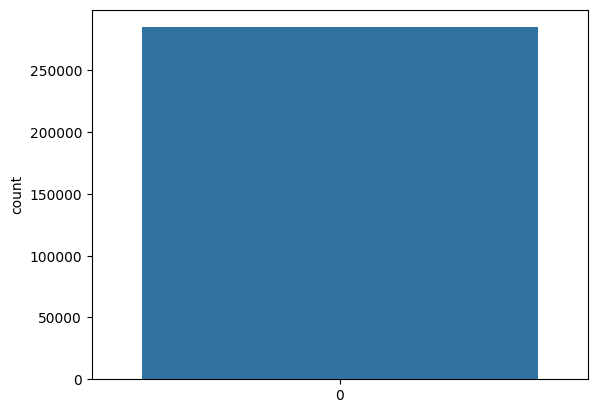

In [23]:
df['Target'].value_counts()
sns.countplot(df['Target'])

Explorando as correlações com o Target

In [24]:
df.corr()['Target'].sort_values(ascending=False)

Target             1.000000
antecedentes       0.154876
cep                0.133447
cidade             0.091289
android            0.040413
emprestimos        0.034783
navegador          0.020090
minuto             0.019875
tempo_transacao    0.017580
lim_crt            0.009536
hist_saldo         0.005632
ind_seguranca      0.004455
relacionamento     0.003308
ios                0.000805
compras           -0.002685
limite_global     -0.004223
qtd_trans         -0.004570
hist_navegacao    -0.007221
Timestamp         -0.012323
dia               -0.043643
ip                -0.094974
so                -0.097733
pais              -0.101347
contas            -0.111485
hora              -0.187257
bairro            -0.192961
tipo_crt          -0.196539
valor             -0.216883
reclamacoes       -0.260593
crt               -0.302544
estabelecimento   -0.326481
Name: Target, dtype: float64

Explorando as correlações de todas as properiedades

In [25]:
df.corr(method='spearman')

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
Timestamp,1.000000,0.190647,-0.006419,-0.473348,-0.142156,0.226004,-0.111408,0.116722,-0.103882,0.017986,...,0.096564,0.132651,0.148505,-0.015980,-0.259220,0.000132,-0.035063,-0.143200,-0.040007,-0.011692
pais,0.190647,1.000000,-0.384328,-0.412095,0.101011,-0.106632,-0.086561,-0.227650,-0.236140,0.138614,...,-0.061958,-0.028827,0.145440,-0.000315,0.049291,0.006380,-0.104815,-0.207967,-0.086663,-0.042424
cidade,-0.006419,-0.384328,1.000000,0.073967,0.155042,0.342701,-0.110393,0.426320,0.006980,-0.077880,...,-0.098255,-0.056478,-0.094982,0.012617,-0.085682,0.033865,0.129234,0.137976,-0.502052,0.051062
bairro,-0.473348,-0.412095,0.073967,1.000000,0.060812,-0.223849,0.171263,-0.074582,0.164374,-0.030876,...,-0.040234,0.004404,-0.140076,-0.000559,0.031854,-0.016689,0.140724,0.180169,-0.000236,-0.059278
cep,-0.142156,0.101011,0.155042,0.060812,1.000000,0.021367,0.075185,0.059920,-0.009608,0.105248,...,0.038960,-0.004931,0.009615,-0.008782,0.060647,-0.064357,-0.033634,0.004757,-0.022117,0.063045
ip,0.226004,-0.106632,0.342701,-0.223849,0.021367,1.000000,-0.007577,0.431573,-0.057022,-0.056580,...,-0.040364,-0.010920,-0.108300,-0.023076,-0.015618,0.029513,0.012883,-0.027806,-0.314061,-0.030147
dia,-0.111408,-0.086561,-0.110393,0.171263,0.075185,-0.007577,1.000000,-0.292680,0.444053,0.028864,...,0.034595,0.040370,-0.050293,-0.135166,-0.011131,-0.023932,0.073772,0.020459,0.205452,-0.038410
hora,0.116722,-0.227650,0.426320,-0.074582,0.059920,0.431573,-0.292680,1.000000,-0.389213,-0.100252,...,-0.022250,-0.023750,-0.186343,-0.012879,-0.046468,0.016724,-0.094494,0.056405,-0.030003,-0.048308
minuto,-0.103882,-0.236140,0.006980,0.164374,-0.009608,-0.057022,0.444053,-0.389213,1.000000,-0.002511,...,0.076569,0.019775,0.075212,-0.024536,-0.074303,-0.007648,0.189916,0.089700,0.004371,0.022706
so,0.017986,0.138614,-0.077880,-0.030876,0.105248,-0.056580,0.028864,-0.100252,-0.002511,1.000000,...,-0.065773,0.001958,0.074164,-0.001572,-0.022575,0.026677,-0.001804,-0.103743,-0.077437,-0.049499


Análise básica de estatisticas

In [26]:
df.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 3 Pré Processamento

Separando os dados para treinamento e teste da máquina preditiva

In [27]:
x = df.drop(['Target'], axis=1)
y = df['Target']

In [28]:
# Balanceamento da Classe Target
smt = SMOTE()

In [31]:
x, y = smt.fit_resample(x, y)

In [34]:
# contagem do target depois do smote
yi = y.astype(int)
np.bincount(yi)

array([284315, 284315])

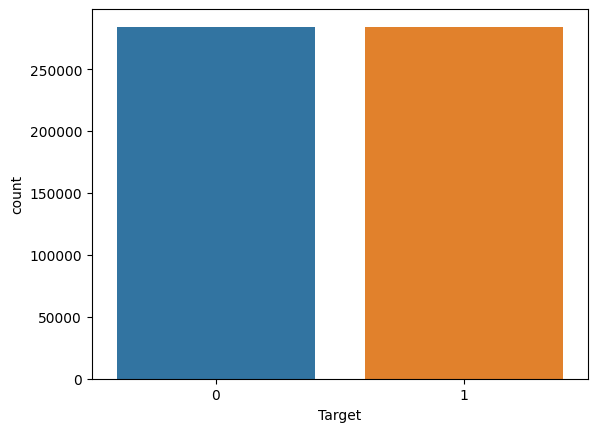

In [35]:
ax = sns.countplot(x=yi)

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=7, stratify=y)

# 4 Criar Máquinas Preditivas de Detecção de Fraude

## XGBoost

In [38]:
model = XGBClassifier()

In [39]:
model = model.fit(x_train, y_train)

In [42]:
y_predict = model.predict(x_val)
y_predict

array([0, 1, 0, ..., 1, 0, 0])

In [44]:
# Criando um gabarito entre a máquina
gab = pd.DataFrame({'Valor Real': y_val, 'Previsao da Maquina': y_predict})
gab

,Valor Real,Previsao da Maquina
32637,0,0
310248,1,1
239726,0,0
264244,0,0
414052,1,1
...,...,...
145904,0,0
57389,0,0
454470,1,1
229461,0,0


In [45]:
# Evaluate Model
print('classification metrics: \n', classification_report(y_val, y_predict))
print('accuracy: \n', accuracy_score(y_val, y_predict))
print('matrix confusion: \n', confusion_matrix(y_val, y_predict))

classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

accuracy: 
 0.9998475868901278
matrix confusion: 
 [[85268    26]
 [    0 85295]]


## LightGBM

In [47]:
train_data = lgb.Dataset(x_train, label=y_train)
param = {
    'num_leaves':1000,
    'objective': 'binary',
    'max_depth': 7,
    'learning_rate':.01,
    'max_bin':200
}

param['metric'] = ['auc', 'binary_logloss']
num_round = 50

lgbm = lgb.train(param, train_data, num_round)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199021
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6000
[LightGBM] [Info] Number of data points in the train set: 398041, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499999 -> initscore=-0.000005
[LightGBM] [Info] Start training from score -0.000005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [49]:
y_predict = lgbm.predict(x_val)

In [50]:
# Criando um gabarito entre a máquina
gab = pd.DataFrame({'Valor Real': y_val, 'Previsao da Maquina': y_predict})
gab

,Valor Real,Previsao da Maquina
32637,0,0.305063
310248,1,0.395811
239726,0,0.330007
264244,0,0.305063
414052,1,0.696839
...,...,...
145904,0,0.307267
57389,0,0.305063
454470,1,0.696839
229461,0,0.305063


In [51]:
y_predict.size

170589

In [52]:
for i in range(0, y_predict.size):
    if y_predict[i] >= .5: # settings threshold to .5
        y_predict[i] = 1
    else:
        y_predict[i] = 0

In [53]:
# Evaluate Model
print('classification metrics: \n', classification_report(y_val, y_predict))
print('accuracy: \n', accuracy_score(y_val, y_predict))
print('matrix confusion: \n', confusion_matrix(y_val, y_predict))

classification metrics: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     85294
           1       0.99      0.98      0.98     85295

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

accuracy: 
 0.9848583437384592
matrix confusion: 
 [[84567   727]
 [ 1856 83439]]


## Random Forest

In [54]:
model = RandomForestClassifier()

In [55]:
model = model.fit(x_train, y_train)
model

RandomForestClassifier()

In [56]:
y_predict = model.predict(x_val)
y_predict

array([0, 1, 0, ..., 1, 0, 0])

In [57]:
gab = pd.DataFrame({'Valor Real': y_val, 'Previsao da Maquina': y_predict})
gab

,Valor Real,Previsao da Maquina
32637,0,0
310248,1,1
239726,0,0
264244,0,0
414052,1,1
...,...,...
145904,0,0
57389,0,0
454470,1,1
229461,0,0


In [58]:
print('classification metrics: \n', classification_report(y_val, y_predict))
print('accuracy: \n', accuracy_score(y_val, y_predict))
print('matrix confusion: \n', confusion_matrix(y_val, y_predict))

classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

accuracy: 
 0.9998886211889395
matrix confusion: 
 [[85275    19]
 [    0 85295]]
